### Load Packages

In [1]:
import tensorflow.compat.v1 as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Generate Dataset

In [3]:
x_train = np.linspace(0,20,30)
y_train = 3*x_train+4 * np.random.randn(30)

In [4]:
print(x_train.shape)

(30,)


In [7]:
y_train[:2]

array([-0.57912158,  6.25809999])

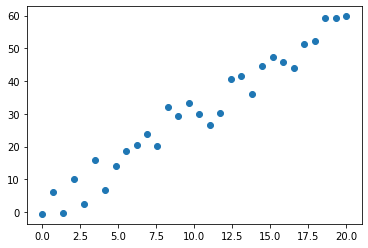

In [9]:
plt.plot(x_train, y_train, "o")

### Define Hyperparameters

In [10]:
learning_rate = 0.01
epochs = 500
n_samples = 30

### Goal: Find a straight line to fit this data

In [16]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name="weights")
B = tf.Variable(np.random.randn(), name="bias")

In [17]:
print(W,B)

<tf.Variable 'weights_1:0' shape=() dtype=float32_ref> <tf.Variable 'bias_1:0' shape=() dtype=float32_ref>


In [21]:
#Print Variales 
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run([W,b]))

[-0.18206398, -0.16721989]


### Calculate Prediction, Cost, & Implement Optimizer

In [22]:
prediction = X * W + B #linear Regression

<img src='n2.png' style="height:200px;">

### Define Cost Function (Half Mean Squared Error)

In [23]:
cost = tf.reduce_sum((prediction-Y)**2)/(2*n_samples)

<img src='cost.png' >

### Optimizer

In [25]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

<img src='1.gif'>

### Run Graph

Epoch: 0 Cost: 46.465240478515625 W: 2.225339412689209 B: 0.037298351526260376
Epoch: 20 Cost: 7.04123067855835 W: 2.9875614643096924 B: 0.11479850113391876
Epoch: 40 Cost: 7.040152072906494 W: 2.98677396774292 B: 0.12703002989292145
Epoch: 60 Cost: 7.0391669273376465 W: 2.9860262870788574 B: 0.13863973319530487
Epoch: 80 Cost: 7.038264274597168 W: 2.985316514968872 B: 0.14965923130512238
Epoch: 100 Cost: 7.037440299987793 W: 2.9846434593200684 B: 0.16011826694011688
Epoch: 120 Cost: 7.036683559417725 W: 2.984004020690918 B: 0.17004534602165222
Epoch: 140 Cost: 7.035992622375488 W: 2.9833972454071045 B: 0.17946766316890717
Epoch: 160 Cost: 7.0353593826293945 W: 2.982821226119995 B: 0.1884109228849411
Epoch: 180 Cost: 7.034777641296387 W: 2.9822745323181152 B: 0.19689896702766418
Epoch: 200 Cost: 7.034244537353516 W: 2.9817557334899902 B: 0.20495562255382538
Epoch: 220 Cost: 7.033754825592041 W: 2.9812636375427246 B: 0.21260270476341248
Epoch: 240 Cost: 7.033304214477539 W: 2.9807958602

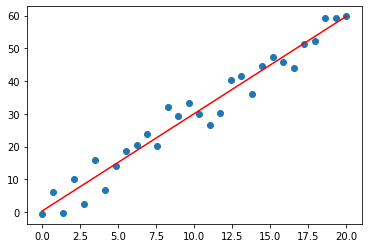

In [30]:
init = tf.global_variables_initializer()

with tf.Session() as sesh:
    sesh.run(init)
    val = []
    for epoch in range(epochs):
        for x,y in zip(x_train, y_train):
            sesh.run(optimizer, feed_dict={X:x, Y:y})
        if epoch%20==0:
            c = sesh.run(cost, feed_dict = {X:x_train, Y:y_train})
            w = sesh.run(W)
            b = sesh.run(B)
            val.append([epoch,c,w,b])
            print("Epoch: {} Cost: {} W: {} B: {}".format(epoch,c,w,b))
    
    weight = sesh.run(W)
    bias = sesh.run(B)
    yprd = weight*x_train + bias
    plt.scatter(x_train, y_train)
    plt.plot(x_train, yprd, 'r')
    plt.show()

### Plot Cost Curve

In [31]:
import pandas as pd

In [33]:
df = pd.DataFrame(val, columns=['epoch','cost','W','B'])
df.head()

epoch       cost         W         B
0      0  46.465240  2.225339  0.037298
1     20   7.041231  2.987561  0.114799
2     40   7.040152  2.986774  0.127030
3     60   7.039167  2.986026  0.138640
4     80   7.038264  2.985317  0.149659

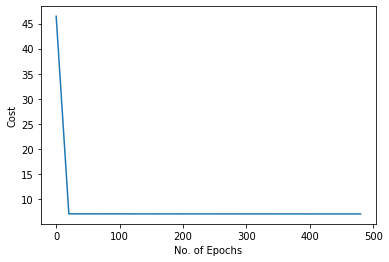

In [36]:
plt.plot(df.iloc[:,0], df.iloc[:,1])
plt.xlabel("No. of Epochs")
plt.ylabel("Cost")
plt.show()